In [20]:
import pandas as pd
import tqdm
import sqlite3 as sq
import matplotlib.pyplot as plt

## Import UIC Data

In [2]:
data_path = "../"

res_name = data_path + 'yelpResData.db'
hot_name = data_path + 'yelpHotelData.db'

res_conn = sq.connect(res_name)
hot_conn = sq.connect(hot_name)

In [3]:
res_tables = res_conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res_tables:
    print(name[0])
    
print("")

hot_tables = hot_conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in hot_tables:
    print(name[0])

review
restaurant
reviewer

review
sqlite_stat1
sqlite_stat2
reviewer
hotel


In [4]:
sql_q = lambda x: "SELECT * FROM " + x + " ;"
res_conn.text_factory = lambda b: b.decode(errors = 'ignore')
hot_conn.text_factory = lambda b: b.decode(errors = 'ignore')

res_rev_df = pd.read_sql(sql_q('review'),res_conn)
res_rest_df = pd.read_sql(sql_q('restaurant'),res_conn)
res_rever_df = pd.read_sql(sql_q('reviewer'),res_conn)

hot_rev_df = pd.read_sql(sql_q('review'),hot_conn)
hot_sqlite1_df = pd.read_sql(sql_q('sqlite_stat1'),hot_conn)
hot_sqlite2_df = pd.read_sql(sql_q('sqlite_stat2'),hot_conn)
hot_rever_df = pd.read_sql(sql_q('reviewer'),hot_conn)
hot_hot_df = pd.read_sql(sql_q('hotel'),hot_conn)

## Table Columns

In [5]:
print("restaurant reviews: ",list(res_rev_df.columns.values))
print("restaurant restaurants: ",list(res_rest_df.columns.values))
print("restaurant reviewers: ",list(res_rever_df.columns.values))
print("")
print("hotel reviews: ",list(hot_rev_df.columns.values))
print("hotel sqlite_stat1: ",list(hot_sqlite1_df.columns.values))
print("hotel sqlite_stat2: ",list(hot_sqlite2_df.columns.values))
print("hotel reviewers: ",list(hot_rever_df.columns.values))
print("hotel hotel: ",list(hot_hot_df.columns.values))

restaurant reviews:  ['date', 'reviewID', 'reviewerID', 'reviewContent', 'rating', 'usefulCount', 'coolCount', 'funnyCount', 'flagged', 'restaurantID']
restaurant restaurants:  ['restaurantID', 'name', 'location', 'reviewCount', 'rating', 'categories', 'address', 'Hours', 'GoodforKids', 'AcceptsCreditCards', 'Parking', 'Attire', 'GoodforGroups', 'PriceRange', 'TakesReservations', 'Delivery', 'Takeout', 'WaiterService', 'OutdoorSeating', 'WiFi', 'GoodFor', 'Alcohol', 'NoiseLevel', 'Ambience', 'HasTV', 'Caters', 'WheelchairAccessible', 'webSite', 'phoneNumber', 'filReviewCount']
restaurant reviewers:  ['reviewerID', 'name', 'location', 'yelpJoinDate', 'friendCount', 'reviewCount', 'firstCount', 'usefulCount', 'coolCount', 'funnyCount', 'complimentCount', 'tipCount', 'fanCount']

hotel reviews:  ['date', 'reviewID', 'reviewerID', 'reviewContent', 'rating', 'usefulCount', 'coolCount', 'funnyCount', 'flagged', 'hotelID']
hotel sqlite_stat1:  ['tbl', 'idx', 'stat']
hotel sqlite_stat2:  ['tbl

In [6]:
# Find unique values of flagged
res_rev_df.loc[:,'flagged'].unique()

array(['N', 'Y', 'NR', 'YR'], dtype=object)

In [7]:
res_rev_df['has_empty'] = res_rev_df.isna().sum(axis=1)>0

In [8]:
print(res_rev_df.loc[res_rev_df['has_empty']==False,'has_empty'].shape)

print(res_rev_df.shape)

(788471,)
(788471, 11)


In [9]:
# Percent flagged
total = res_rev_df.shape[0]

print("N #: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='N',:].shape[0])
print("N %: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='N',:].shape[0]/total)
print("")
print("Y #: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='Y',:].shape[0])
print("Y %: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='Y',:].shape[0]/total)
print("")
print("NR #: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='NR',:].shape[0])
print("NR %: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='NR',:].shape[0]/total)
print("")
print("YR #: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='YR',:].shape[0])
print("YR %: ",res_rev_df.loc[res_rev_df.loc[:,'flagged']=='YR',:].shape[0]/total)

N #:  58716
N %:  0.07446817955257708

Y #:  8303
Y %:  0.0105305077802481

NR #:  402774
NR %:  0.5108291871229252

YR #:  318678
YR %:  0.4041721255442496


In [10]:
print(len(res_rev_df['reviewID'].unique()))

788471


In [11]:
res_rev_df.head()

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,has_empty
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,N,pbEiXam9YJL3neCYHGwLUA,False
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,N,pbEiXam9YJL3neCYHGwLUA,False
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,N,pbEiXam9YJL3neCYHGwLUA,False
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,N,pbEiXam9YJL3neCYHGwLUA,False
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,N,pbEiXam9YJL3neCYHGwLUA,False


In [12]:
hot_rev_df.head()

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,hotelID
0,6/8/2011,MyNjnxzZVTPq,IFTr6_6NI4CgCVavIL9k5g,Let me begin by saying that there are two kind...,5,18,11,28,N,tQfLGoolUMu2J0igcWcoZg
1,8/30/2011,BdD7fsPqHQL73hwENEDT-Q,c_-hF15XgNhlyy_TqzmdaA,The only place inside the Loop that you can st...,3,0,3,4,N,tQfLGoolUMu2J0igcWcoZg
2,6/26/2009,BfhqiyfC,CiwZ6S5ZizAFL5gypf8tLA,I have walked by the Tokyo Hotel countless tim...,5,12,14,23,N,tQfLGoolUMu2J0igcWcoZg
3,9/16/2010,Ol,nf3q2h-kSQoZK2jBY92FOg,"If you are considering staying here, watch thi...",1,8,2,6,N,tQfLGoolUMu2J0igcWcoZg
4,2/5/2010,i4HIAcNTjabdpG1K4F5Q2g,Sb3DJGdZ4Rq__CqxPbae-g,"This place is disgusting, absolutely horrible,...",3,11,4,9,N,tQfLGoolUMu2J0igcWcoZg


In [13]:
res_rest_df.head()

,restaurantID,name,location,reviewCount,rating,categories,address,Hours,GoodforKids,AcceptsCreditCards,...,GoodFor,Alcohol,NoiseLevel,Ambience,HasTV,Caters,WheelchairAccessible,webSite,phoneNumber,filReviewCount
0,pbEiXam9YJL3neCYHGwLUA,Alinea,"Alinea - Lincoln Park - Chicago, IL",841,4.5,"Restaurants, American (New)",1723 N Halsted St (between Willow St & Concord...,Wed-Sun 5 pm - 6:30 pm Wed-Sun 8 pm - 9:30 pm,No,Yes,...,Dinner,Full Bar,Quiet,"Classy, Upscale",No,No,Yes,http://www.alinearestaurant.com,(312) 867-0110,136
1,HOJqzz1WvOmeR9oESJ4d9A,Hot Doug's,"Hot Doug's - Avondale - Chicago, IL",2122,4.5,"Restaurants, Fast Food, Hot Dogs",3324 N California Ave (between Henderson St & ...,Mon-Sat 10:30 am - 4 pm,Yes,No,...,Lunch,No,Average,Casual,No,No,Yes,http://www.hotdougs.com,(773) 279-9550,234
2,AkfSndWBxnTn-LpmiL8aLA,Tru,"Tru - Near North Side - Chicago, IL",403,4.5,"Restaurants, American (New)",676 N St. Clair St (between Erie St & Huron St...,Mon-Thu 6 pm - 9:30 pm Fri 6 pm - 10 pm Sat 5 ...,No,Yes,...,Dinner,Full Bar,Quiet,"Classy, Upscale",No,No,Yes,http://www.TRUrestaurant.com,(312) 202-0001,52
3,WBU0yq9J8qiYQfI_fh2P1Q,Crisp,"Crisp - Lakeview - Chicago, IL",1026,4.0,"Restaurants, Korean, Chicken Wings",2940 N Broadway Ave (between Oakdale Ave & Wel...,Tue-Sun 11:30 am - 9 pm,Yes,Yes,...,"Lunch, Dinner",No,Average,Casual,Yes,No,Yes,http://www.crisponline.com,(773) 697-7610,99
4,bNXpwTSavHBV9zBk2lUlGA,Schwa,"Schwa - Wicker Park - Chicago, IL",288,4.5,"Restaurants, American (New)",1466 N Ashland Ave (between Julian St & Le Moy...,Tue-Sat 5:30 pm - 10:30 pm,No,Yes,...,Dinner,No,Very Loud,Hipster,No,No,Yes,http://www.schwarestaurant.com,(773) 252-1466,55


### Business Categories

In [63]:
def plotDict(valuesDict, topK, fileName, title):
    labels = list(valuesDict.keys())[0:topK]
    values = list(valuesDict.values())[0:topK]
#     for i in range(0, topK):
#         print (labels[i] + " : " + str(values[i]))
    fig, axes = plt.subplots(figsize=(12, 10))
    axes.pie(values,
            labels = labels,
            
            startangle=90)
#     plt.figure(figsize=(20,20))
    plt.title(title)

    axes.axis('equal')
    plt.savefig(fileName)


In [64]:
import collections

In [68]:
def updateCount(businessCategories, categoryCount):
    if businessCategories is None:
        return
    for category in businessCategories.split(','):
        category = category.strip().lower()
        if category in categoryCount:
            categoryCount[category] = categoryCount[category] + 1
        else:
            categoryCount[category] = 1

Total Number of Categories : 739
Total Number of Businesses : 242652


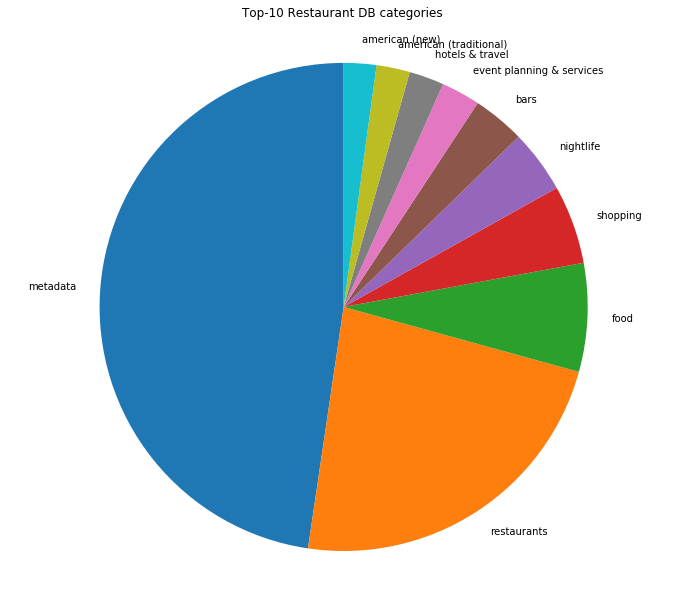

In [69]:
categoryCountRes = {}
for businessCategories in res_rest_df.categories:
    updateCount(businessCategories, categoryCountRes)

print ("Total Number of Categories : " + str(len(categoryCountRes)))
print ("Total Number of Businesses : " + str(res_rest_df.shape[0]))
sortedCategoryCountsResDict = collections.OrderedDict({k: v for k, v in sorted(categoryCountRes.items(), key=lambda item: item[1], reverse = True)})
plotDict(sortedCategoryCountsResDict, 10, "top10_restaurant_categories.png", "Top-10 Restaurant DB categories\n")


Total Number of Categories : 760
Total Number of Businesses : 283086


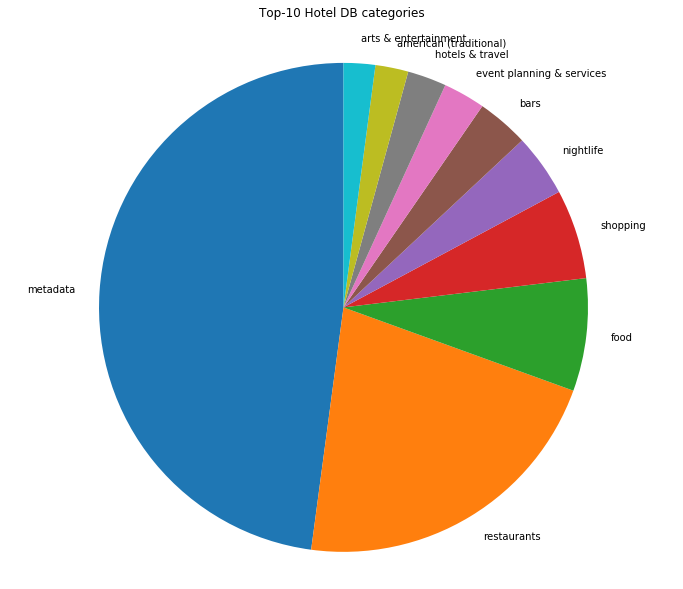

In [70]:
categoryCountHotel = {}
for businessCategories in hot_hot_df.categories:
    updateCount(businessCategories, categoryCountHotel)

print ("Total Number of Categories : " + str(len(categoryCountHotel)))
print ("Total Number of Businesses : " + str(hot_hot_df.shape[0]))
sortedCategoryCountsHotelDict = collections.OrderedDict({k: v for k, v in sorted(categoryCountHotel.items(), key=lambda item: item[1], reverse = True)})
plotDict(sortedCategoryCountsHotelDict, 10, "top10_hotel_categories.png", "Top-10 Hotel DB categories\n")

### Most Reviewed Business Categories

In [75]:
#Cross check this data against review count from business.json.
def countReviews(rev_df, biz_df, dbType, key):
    categoryToReviewCount = {}
    counter = 0
    for businessId, count in rev_df[key].value_counts().iteritems():
        counter += 1
        if counter % 100000 == 0:
            print (counter)
        for categories in biz_df.loc[biz_df[key] == businessId]['categories']:
            for category in categories.split(","):
                category = category.strip().lower()
                if category in categoryToReviewCount:
                    categoryToReviewCount[category]  = categoryToReviewCount[category] + count
                else:
                    categoryToReviewCount[category] = count
    sortedcategoryToReviewCount = collections.OrderedDict(
        {k: v for k, v in sorted(categoryToReviewCount.items(), key=lambda item: item[1], reverse = True)})

    plotDict(sortedcategoryToReviewCount, 10, 
             "top10_business_by_reviews_" + dbType.replace(" ", "_") + "_categories.png", dbType.replace(" ", "_") + ": Top-10 most reviewed business categories\n")

In [ ]:
countReviews(res_rev_df, res_rest_df, "Restaurant DB", "restaurantID")

In [ ]:
countReviews(hot_rev_df, hot_hot_df, "Hotel DB", "hotelID")

### Review Star Counting


In [79]:
def starCounting(rev_df, fileName, dbType):
    starCounts = {}
    for stars, counts in rev_df['rating'].value_counts().iteritems():
        starCounts[stars] = counts

    plt.bar(starCounts.keys(), starCounts.values(), color='b')
    plt.title("Count by Star Ratings " + dbType )
    plt.savefig(fileName)

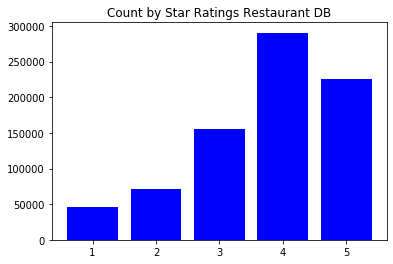

In [80]:
starCounting(res_rev_df, "star_counting_restaurant_db.png", "Restaurant DB")

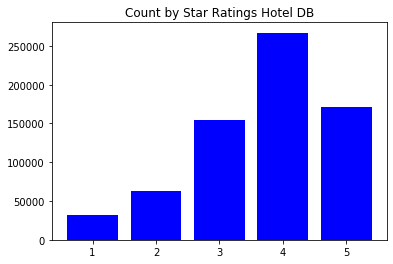

In [81]:
starCounting(hot_rev_df, "star_counting_hotel_db.png", "Hotel DB")

### Review Length Bins

In [83]:
def reviewLengthBinning(rev_df, reviewKey, dbType):
    plt.hist(rev_df[reviewKey].str.len(), bins = 50, color = "skyblue")
    plt.xlabel("Review length")
    plt.ylabel("Count")
    plt.title(dbType + ": Review length histogram")
    plt.savefig("review_length_bins" + dbType.replace(" ", "_") + ".png")

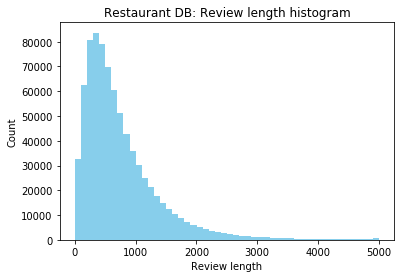

In [84]:
reviewLengthBinning(res_rev_df, "reviewContent", "Restaurant DB")

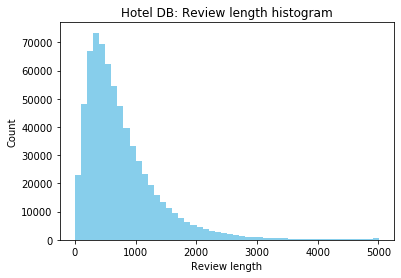

In [85]:
reviewLengthBinning(hot_rev_df, "reviewContent", "Hotel DB")

In [86]:
print("---------------------Restaurant DB -------------------")
print("Missing Review data\n")
print(res_rev_df.isna().sum())
print("\n\nMissing Business data\n")
print(res_rest_df.isna().sum())
print("------------------------------------------------------")

---------------------Restaurant DB -------------------
Missing Review data

date             0
reviewID         0
reviewerID       0
reviewContent    0
rating           0
usefulCount      0
coolCount        0
funnyCount       0
flagged          0
restaurantID     0
has_empty        0
dtype: int64


Missing Business data

restaurantID                 0
name                         0
location                     0
reviewCount                  0
rating                       0
categories                   0
address                      0
Hours                   136324
GoodforKids             115638
AcceptsCreditCards       60376
Parking                 104533
Attire                  133375
GoodforGroups           126323
PriceRange               63198
TakesReservations       140023
Delivery                141408
Takeout                 137383
WaiterService           134260
OutdoorSeating          121369
WiFi                    157643
GoodFor                 153147
Alcohol                 12

In [87]:
print("---------------------Hotel DB -------------------")
print("Missing Review data\n")
print(hot_rev_df.isna().sum())
print("\n\nMissing Business data\n")
print(hot_hot_df.isna().sum())
print("------------------------------------------------------")

---------------------Hotel DB -------------------
Missing Review data

date             0
reviewID         0
reviewerID       0
reviewContent    0
rating           0
usefulCount      0
coolCount        0
funnyCount       0
flagged          0
hotelID          0
dtype: int64


Missing Business data

hotelID                    0
name                       0
location                   0
reviewCount                0
rating                     0
categories                 0
address                    0
AcceptsCreditCards     76160
PriceRange             79426
WiFi                  191139
webSite                94294
phoneNumber            14606
filReviewCount             0
dtype: int64
------------------------------------------------------
